# 1. Import Libraries

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

import time 

# 2. Dataset

In [50]:
data = pd.read_csv('datasets/Dataset2/train.csv')
test = pd.read_csv('datasets/Dataset2/test.csv')

data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [51]:
data.info()
data.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


# 3. Data Preprocessing

In [52]:
# Drop id
for df in [data, test]:
    if 'id' in df.columns:
        df.drop('id', axis=1, inplace=True)

# Pisah fitur dan target
y = data['price_range']
X = data.drop('price_range', axis=1)

# Split 70:30
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Method

## 4.1. SVM

In [53]:
start_time = time.time()

svm = SVC(kernel='rbf', decision_function_shape='ovr')
svm.fit(X_train, y_train)

end_time = time.time()
print(f"Training Time: {end_time - start_time:.2f} seconds")

y_pred = svm.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))
print(confusion_matrix(y_test, y_pred))

Training Time: 0.04 seconds
              precision    recall  f1-score   support

           0     0.9655    0.9333    0.9492       150
           1     0.8503    0.8333    0.8418       150
           2     0.7654    0.8267    0.7949       150
           3     0.9041    0.8800    0.8919       150

    accuracy                         0.8683       600
   macro avg     0.8713    0.8683    0.8694       600
weighted avg     0.8713    0.8683    0.8694       600

[[140  10   0   0]
 [  5 125  20   0]
 [  0  12 124  14]
 [  0   0  18 132]]


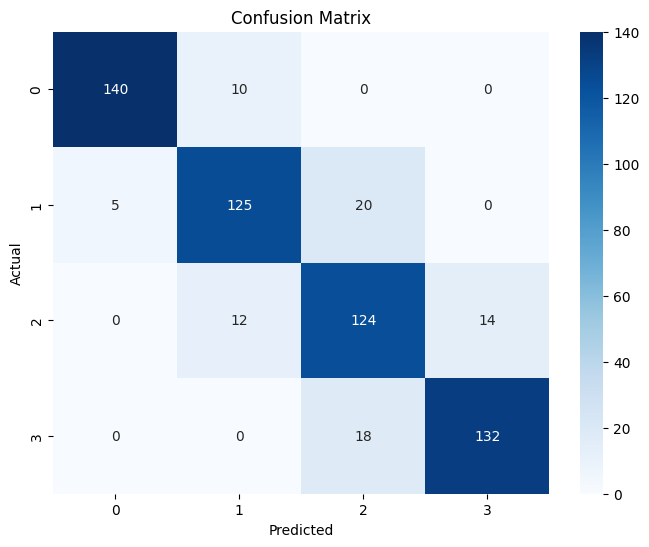

In [54]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 4.2. MLP

In [55]:
start_time = time.time()

mlp = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=200, random_state=42)
mlp.fit(X_train, y_train)

end_time = time.time()
print(f"Training Time: {end_time - start_time:.2f} seconds")

y_pred = mlp.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))
print(confusion_matrix(y_test, y_pred))

Training Time: 4.17 seconds
              precision    recall  f1-score   support

           0     0.9510    0.9067    0.9283       150
           1     0.8693    0.8867    0.8779       150
           2     0.8919    0.8800    0.8859       150
           3     0.9231    0.9600    0.9412       150

    accuracy                         0.9083       600
   macro avg     0.9088    0.9083    0.9083       600
weighted avg     0.9088    0.9083    0.9083       600

[[136  14   0   0]
 [  7 133  10   0]
 [  0   6 132  12]
 [  0   0   6 144]]


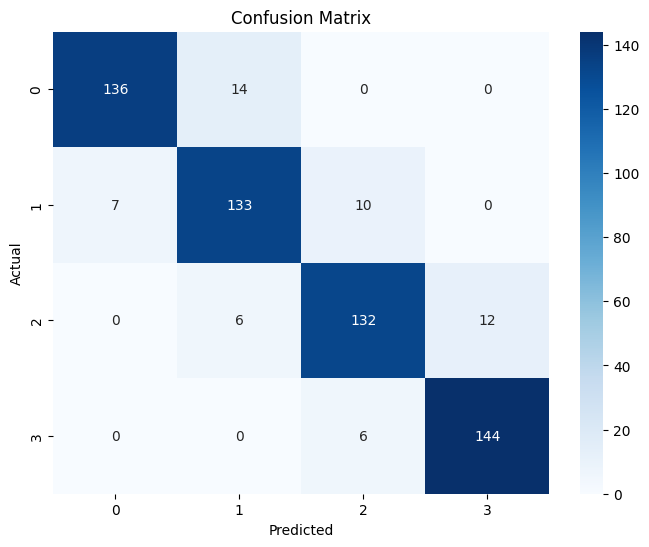

In [56]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 4.3. CNN

In [57]:
# Reshape for CNN-1D
timesteps = X_train.shape[1]

X_train_cnn = X_train.reshape(-1, timesteps, 1)
X_test_cnn = X_test.reshape(-1, timesteps, 1)

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

start_time = time.time()

# Define CNN model
model_cnn = Sequential([
    Input(shape=(timesteps, 1)),
    Conv1D(32, 3, activation='relu'),
    Dropout(0.3),
    Conv1D(64, 3, activation='relu'),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(y_train_cat.shape[1], activation='softmax')
])

# Compile and train
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_cnn.fit(X_train_cnn, y_train_cat, epochs=25, batch_size=32, validation_split=0.2)

end_time = time.time()
print(f"Training Time: {end_time - start_time:.2f} seconds")

# Evaluate
y_cnn_pred = np.argmax(model_cnn.predict(X_test_cnn), axis=1)
print(classification_report(y_test, y_pred, digits=4))
print(confusion_matrix(y_test, y_cnn_pred))

Epoch 1/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3800 - loss: 1.2986 - val_accuracy: 0.7071 - val_loss: 0.8119
Epoch 2/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6892 - loss: 0.7399 - val_accuracy: 0.7821 - val_loss: 0.5193
Epoch 3/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7548 - loss: 0.5400 - val_accuracy: 0.8714 - val_loss: 0.3807
Epoch 4/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8246 - loss: 0.4402 - val_accuracy: 0.8929 - val_loss: 0.3299
Epoch 5/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8298 - loss: 0.3704 - val_accuracy: 0.8464 - val_loss: 0.3741
Epoch 6/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8563 - loss: 0.3298 - val_accuracy: 0.9000 - val_loss: 0.2683
Epoch 7/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8856 - loss: 0.2832 - val_accuracy: 0.9000 - val_loss: 0.2510
Epoch 8/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8739 - loss: 0.2994 - val_accuracy: 0.8750 - val_loss:

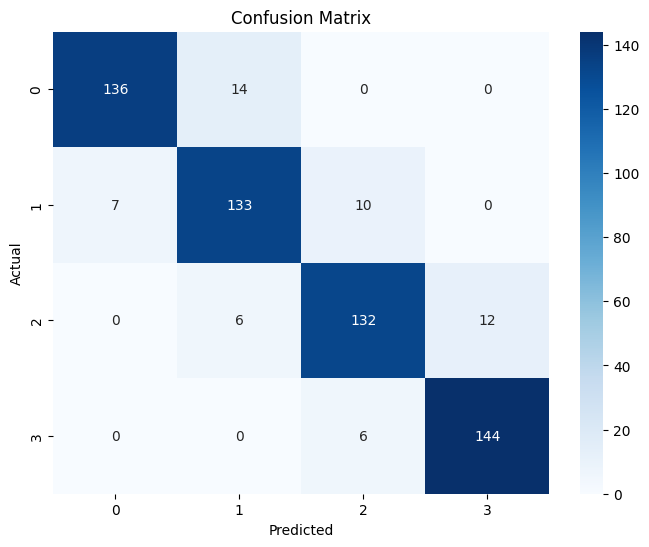

In [58]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [59]:
# Initialize SVM with probability=True
svm = SVC(kernel='rbf', decision_function_shape='ovr', probability=True)
svm.fit(X_train, y_train)

# Get probabilities for ROC-AUC
probs = svm.predict_proba(X_test)
print("SVM Multi-class ROC-AUC (OVR):", roc_auc_score(y_test, probs, multi_class='ovr'))

SVM Multi-class ROC-AUC (OVR): 0.9795851851851851
